Chapter 1
===

Selenium就是一個自動化框架，透過它提供的WebDriver（API），我們可以模擬使用者的行為與瀏覽器交互。

下面是透過一個腳本，瞭解Selenium基本的運作：

In [2]:
# %load ./chapter01/searchproducts.py
from selenium import webdriver

# create a new Firefox session
driver = webdriver.Firefox()
driver.implicitly_wait(5)
# driver.maximize_window()

# navigate to the application home page
driver.get('http://www.google.com/')
# 
# get the search textbox
search_field = driver.find_element_by_name('q')
search_field.clear()

# enter search keyword and submit
search_field.send_keys('phones')
search_field.submit()

# get all the anchor elements which have product names displayed
# currently on result page using find_elements_by_xpath method
titles = driver.find_elements_by_xpath("//a/h3[@class='LC20lb DKV0Md']")

# get the number of anchor elements found
print('Found ' + str(len(titles)) + ' titles:')

# iterate through each anchor element and
# print the text that is name of the product
for title in titles:
    print(title.text)

# close the browser window
driver.quit()


Found 8 titles:
All Samsung phones - GSMArena.com
GSMArena.com - mobile phone reviews, news, specifications ...
Phones | TechRadar
Phone Reviews - CNET
The Best Phones for 2020 | PCMag
Phones & Tablets | Android
Phones from AT&T
最新Nokia Android 系統智慧型手機及手機| Nokia 手機台灣


Chapter 2
===

* Test Fixture（測試夾具）：藉由使用測試夾具，可以定義一個或多個測試前的預處理或是測試后的清理程序。
* Test Case（測試案例）：test case是unittest中執行的最小單元。通過unittest提供的assert方法可以驗證一組輸入的響應。
* Test Suite（測試套件）：測試套件為多個測試或測試案例的集合體，是針對被測程序的對應功能和模塊創建的测试。一個套件内的测试用例將一起执行。
* Test Runner（測試執行器）：測試執行器負責測試執行調度並生成測試结果给用户。可以使用圖形界面、文字界面或者特定的返回值來展示測試结果。
* Test Report（測試報告）：測試報告匯總所有執行案例的成功或者失败；失敗的測試步骤的預期结果與實際结果，還有整體運行狀況和運行時間的彙整。

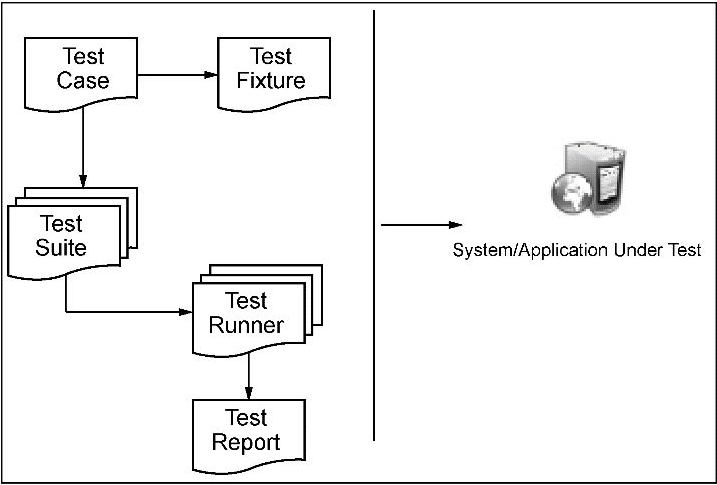

下面透過案例瞭解一下unittest的運行流程。
透過setup和tearDown...

In [3]:
# %load ./chapter02/searchtests.py
import unittest
from selenium import webdriver


class SearchTests(unittest.TestCase):
    def setUp(self): # 測試夾具
        # create a new Firefox session
        self.driver = webdriver.Firefox()
        self.driver.implicitly_wait(30)
#         self.driver.maximize_window()

        # navigate to the application home page
        self.driver.get('http://www.google.com/')

    def test_search_by_category(self):# 測試案例
        # get the search textbox
        self.search_field = self.driver.find_element_by_name('q')
        self.search_field.clear()

        # enter search keyword and submit
        self.search_field.send_keys('phones')
        self.search_field.submit()

        # get all the anchor elements which have product names displayed
        # currently on result page using find_elements_by_xpath method
        products = self.driver\
            .find_elements_by_xpath("//a/h3[@class='LC20lb DKV0Md']")
        self.assertEqual(8, len(products))

    def test_search_by_name(self):# 測試案例
        # get the search textbox
        self.search_field = self.driver.find_element_by_name('q')
        self.search_field.clear()

        # enter search keyword and submit
        self.search_field.send_keys('salt shaker')
        self.search_field.submit()

        # get all the anchor elements which have product names displayed
        # currently on result page using find_elements_by_xpath method
        products = self.driver.\
            find_elements_by_xpath("//a/h3[@class='LC20lb DKV0Md']")
        self.assertEqual(1, len(products))

    def tearDown(self): # 測試夾具
        # close the browser window
        self.driver.quit()

if __name__ == '__main__':
#     unittest.main(verbosity=2) # verbosity参数以便使详细的测试总量展示在控制台
    # 在ipython中unittest.main會檢查參數（sys.argv），所以報錯，
    # 並且還需要使用exit = False來防止unittest.main關閉內核進程。
    unittest.main(verbosity=2, argv=['first-arg-is-ignored'], exit=False) 

test_search_by_category (__main__.SearchTests) ... ok
test_search_by_name (__main__.SearchTests) ... C:\Python36\pythonENV\selenium\lib\site-packages\urllib3\util\timeout.py:183: ResourceWarning: unclosed <socket.socket fd=1052, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 17534), raddr=('127.0.0.1', 17530)>
  return Timeout(connect=self._connect, read=self._read, total=self.total)
FAIL

FAIL: test_search_by_name (__main__.SearchTests)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-3-6406cbef7fa1>", line 44, in test_search_by_name
    self.assertEqual(1, len(products))
AssertionError: 1 != 7

----------------------------------------------------------------------
Ran 2 tests in 11.903s

FAILED (failures=1)


unittest還可以這樣用
---
上面試過了
